In [ ]:
import numpy as pd
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data=pd.read_csv('churn_data.csv', index_col=False)
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14990 non-null  float64
 1   evaluation            14936 non-null  float64
 2   number_of_projects    14955 non-null  object 
 3   average_montly_hours  14973 non-null  float64
 4   time_spend_company    14999 non-null  object 
 5   work_accident         14999 non-null  object 
 6   churn                 14999 non-null  object 
 7   promotion             14999 non-null  object 
 8   department            14958 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,satisfaction,evaluation,average_montly_hours
count,14990.000000,14936.000000,14973.000000
mean,0.612817,716.085297,201.050424
std,0.248704,171.529563,49.986445
min,0.090000,360.000000,96.000000
25%,0.440000,560.000000,156.000000
50%,0.640000,720.000000,200.000000
75%,0.820000,870.000000,245.000000
max,1.000000,1000.000000,310.000000


In [ ]:
duplicated_rows = data.duplicated()

In [ ]:
duplicated_rows.sum()

np.int64(2966)

In [ ]:
data = data[~duplicated_rows]

In [ ]:
data.shape

(12033, 10)

In [ ]:
data.isna()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14067,False,False,False,False,False,False,False,False,False,False
14154,False,True,False,False,False,False,False,False,False,False
14164,False,False,False,False,False,False,False,False,False,False
14176,False,False,True,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

,0
satisfaction,9
evaluation,60
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [ ]:
num_df = data.select_dtypes(include = "number")
cat_df = data.select_dtypes(include = "object_")

In [ ]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)
print("Categorical columns are")
cat_cols = cat_df.columns.tolist()
print(cat_cols)

Numerical columns are
['satisfaction', 'evaluation', 'average_montly_hours']
Categorical columns are
['number_of_projects', 'time_spend_company', 'work_accident', 'churn', 'promotion', 'department', 'salary']


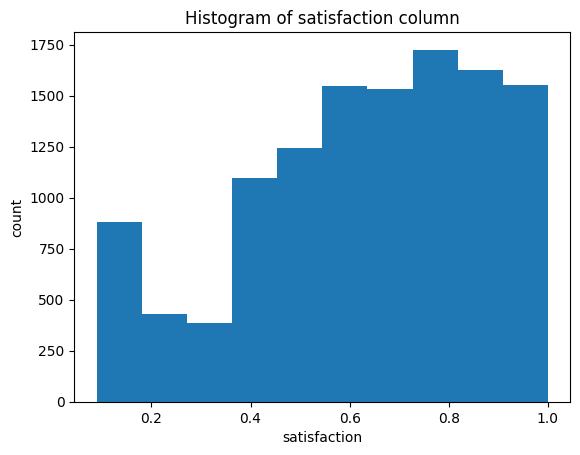

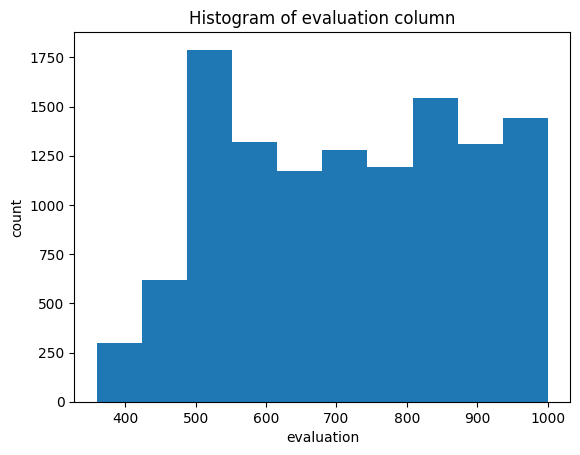

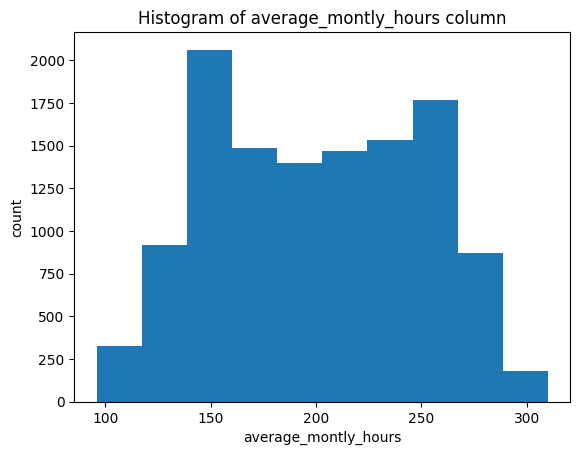

In [ ]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

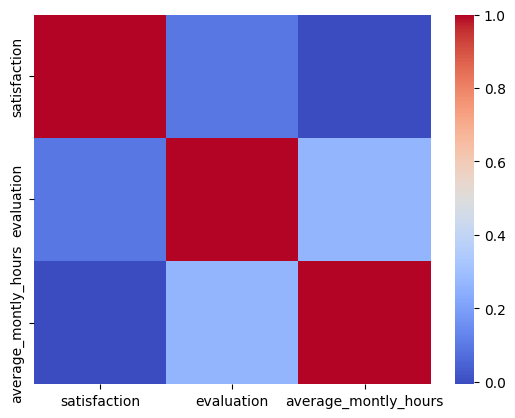

In [ ]:
sns.heatmap(num_df.corr(), annot=False, cmap='coolwarm')
plt.show()

In [ ]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

In [ ]:
num_df.isna().sum()

,0
satisfaction,0
evaluation,0
average_montly_hours,0


In [ ]:
for col in cat_cols:
    print(cat_df[col].mode())

0    four
Name: number_of_projects, dtype: object
0    3+
Name: time_spend_company, dtype: object
0    no
Name: work_accident, dtype: object
0    no
Name: churn, dtype: object
0    no
Name: promotion, dtype: object
0    sales
Name: department, dtype: object
0    low
Name: salary, dtype: object


In [ ]:
for col in cat_cols:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [ ]:
cat_df.isna().sum()

,0
number_of_projects,0
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,0
salary,0


In [ ]:
num_df = pd.DataFrame(num_df, columns=num_cols)

In [ ]:
num_df.head(2)


,satisfaction,evaluation,average_montly_hours
0,0.38,530.0,157.0
1,0.80,860.0,262.0


In [ ]:
for col in num_cols[:-1]:
  num_df[col] = (num_df[col]-num_df[col].min())/(num_df[col].max()-num_df[col].min())

In [ ]:
num_df.head(2)


,satisfaction,evaluation,average_montly_hours
0,0.318681,0.265625,157.0
1,0.780220,0.781250,262.0


In [ ]:
num_df

,satisfaction,evaluation,average_montly_hours
0,0.318681,0.265625,157.0
1,0.780220,0.781250,262.0
2,0.021978,0.812500,272.0
3,0.692308,0.796875,223.0
4,0.307692,0.250000,159.0
...,...,...,...
14067,0.791209,0.875000,268.0
14154,0.835165,0.562500,245.0
14164,0.428571,0.562500,143.0
14176,0.824176,0.703125,236.0


In [ ]:
cat_df.head(2)

,number_of_projects,time_spend_company,work_accident,churn,promotion,department,salary
0,two,3+,no,yes,no,sales,low
1,five,6+,no,yes,no,sales,medium


In [ ]:
cat_cols = cat_df.columns.tolist()


In [ ]:
for col in cat_cols:
  print(cat_df[col].value_counts())

number_of_projects
four     3705
three    3533
five     2236
two      1584
six       830
seven     145
Name: count, dtype: int64
time_spend_company
3+     5202
2+     2920
4+     2011
5+     1064
6+      545
10+     113
7+       96
8+       82
Name: count, dtype: int64
work_accident
no     10174
yes     1859
Name: count, dtype: int64
churn
no     10037
yes     1996
Name: count, dtype: int64
promotion
no     11828
yes      205
Name: count, dtype: int64
department
sales          3264
technical      2247
support        1825
IT              979
RandD           694
product_mng     686
marketing       675
accounting      622
hr              601
management      440
Name: count, dtype: int64
salary
low       5760
medium    5278
high       995
Name: count, dtype: int64


In [ ]:
print(cat_df['number_of_projects'].unique())

['two' 'five' 'seven' 'six' 'four' 'three']


In [ ]:
print(cat_df['department'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [ ]:
cat_df['number_of_projects'] = cat_df['number_of_projects'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5,'six':6, 'seven':7})
cat_df['time_spend_company'] = cat_df['time_spend_company'].astype(str).str.replace('+', '').astype(int)
binary_cols = ['work_accident', 'churn', 'promotion']
cat_df[binary_cols] = cat_df[binary_cols].replace({'yes': 1, 'no': 0})
salary_map = {'low': 0, 'medium': 1, 'high': 2}
cat_df['salary'] = cat_df['salary'].map(salary_map)
cat_df['department']=cat_df['department'].map({'sales':0, 'accounting':1, 'hr':2, 'technical':3, 'support':4, 'management':5, 'IT':6,
 'product_mng':7, 'marketing':8, 'RandD':9})


<ipython-input-32-5944c59c6e89>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_df[binary_cols] = cat_df[binary_cols].replace({'yes': 1, 'no': 0})


In [ ]:
cat_df.head()

,number_of_projects,time_spend_company,work_accident,churn,promotion,department,salary
0,2,3,0,1,0,0,0
1,5,6,0,1,0,0,1
2,7,4,0,1,0,0,1
3,5,5,0,1,0,0,0
4,2,3,0,1,0,0,0


In [ ]:
data = pd.concat([num_df, cat_df], axis=1)

In [ ]:
data.head()


,satisfaction,evaluation,average_montly_hours,number_of_projects,time_spend_company,work_accident,churn,promotion,department,salary
0,0.318681,0.265625,157.0,2,3,0,1,0,0,0
1,0.780220,0.781250,262.0,5,6,0,1,0,0,1
2,0.021978,0.812500,272.0,7,4,0,1,0,0,1
3,0.692308,0.796875,223.0,5,5,0,1,0,0,0
4,0.307692,0.250000,159.0,2,3,0,1,0,0,0


In [ ]:
X = data.drop('churn', axis=1)
y = data['churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,satisfaction,evaluation,average_montly_hours,number_of_projects,time_spend_company,work_accident,promotion,department,salary
3739,0.461538,0.218750,147.0,3,4,0,0,0,1
2485,0.956044,0.281250,153.0,3,2,0,0,3,1
7767,0.648352,0.453125,134.0,4,3,0,0,3,1
3778,0.780220,0.656250,175.0,3,3,0,0,3,1
9450,0.637363,0.546875,178.0,4,6,0,0,6,0
...,...,...,...,...,...,...,...,...,...
6632,0.945055,0.593750,139.0,3,2,0,0,6,1
11390,0.439560,0.375000,264.0,4,2,1,0,7,0
4612,0.428571,0.375000,121.0,2,5,0,0,2,0
1807,0.021978,0.906250,280.0,7,5,0,0,4,0


In [ ]:
lr_model=LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr=lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lr)}")

Accuracy: 0.8375571250519319
Precision: 0.503448275862069
Recall: 0.18622448979591838
F1 Score: 0.2718808193668529
Confusion Matrix:
[[1943   72]
 [ 319   73]]


SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svmclf = SVC(kernel='poly')
svmclf.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
y_pred_svm = svmclf.predict(X_test)

In [ ]:

print('Accuracy is:', accuracy_score(y_test, y_pred_svm))

Accuracy is: 0.837141670128791


In [ ]:
print(confusion_matrix(y_test, y_pred_svm))

[[2015    0]
 [ 392    0]]


In [ ]:
print(f"Precision:", precision_score(y_test,y_pred_svm))
print(f"Recall:", recall_score(y_test,y_pred_svm))
print(f"F1 Score:", f1_score(y_test,y_pred_svm))

Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import DecisionTreeRegressor#
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pred_dt))

Accuracy is: 0.9721645201495638


In [ ]:
print(confusion_matrix(y_test, y_pred_dt))

[[1973   42]
 [  25  367]]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred_rf = rf_clf.predict(X_test)

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pred_rf))

Accuracy is: 0.9858745326132115


In [ ]:
print(confusion_matrix(y_test, y_pred_rf))

[[2009    6]
 [  28  364]]


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

In [ ]:
model = LogisticRegression()
kf = KFold(n_splits=10)


In [ ]:
cv_scores = cross_val_score(model,X,y,cv=kf)
cv_scores = np.round(cv_scores,4)
print("Cross Validation Scores are:")
for cv_score in cv_scores:
    print(cv_score)
print("Average Cross Validation Score:", np.mean(cv_scores))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Scores are:
0.0
0.4252
0.9618
0.9551
0.9501
0.9659
0.9701
0.9468
0.9651
0.7581
Average Cross Validation Score: 0.78982


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Grid Search

In [ ]:
parameters = {'max_depth':[10,20,30],
              'criterion':['gini','entropy'],
              'n_estimators':[50,100,200]}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
grid_search = GridSearchCV(
    RandomForestClassifier(),
    parameters,
    cv=5,
    scoring='accuracy',
    n_jobs= -1
    )

In [ ]:
grid_result = grid_search.fit(X_train, y_train)

In [ ]:
print('Best Params:', grid_result.best_params_)
print('Best Score:', grid_result.best_score_)

Best Params: {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 200}
Best Score: 0.9847288910466482


Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                   param_distributions = parameters, verbose = 1,
                                   n_jobs = -1, n_iter = 50)
random_result = random_search.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
print('Best Params:', random_result.best_params_)
print('Best Score:', random_result.best_score_)

Best Params: {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'}
Best Score: 0.984521152782835
